# প্রজেক্ট ৬ঃ ক্লাসিফিকেশন সমস্যা (home loan dataset)


In [ ]:
মেশিন লার্নিং প্রজেক্ট চেকলিস্ট দেখা যাক -

১) প্রবলেম ডেফিনেশন ( প্রবলেম ও ডেটাসেট সম্পর্কে বিস্তারিত জানা)

২) ডেটাসেট লোড করা।

৩) এনালাইজ ডেটা (ডেসক্রিপ্টিভ স্ট্যাটিস্টিক্স ও ডেটা ভিজ্যুয়ালাইজেশন )

৪) ভ্যালিডেশন ডেটা সেট (ডেটাসেটকে স্প্লিট করা)

৫) ইভ্যালুয়েট এলগরিফদম ( ডেটাকে প্রিপ্রসের না করে)

৬) ইভ্যালুয়েট এলগরিফদম ( ডেটাকে প্রিপ্রসের করে)

৭) ইম্প্রুভ রেজাল্ট ( প্যারামিটার টিউনিং করে)

৮) এনস্যাম্বল মেথড ব্যবহার করে মডেলের এক্যুরেসি বাড়ানো

৯) টিউনিং এনস্যাম্বল মেথড।

১০) ফাইনালাইজ মডেল।\

In [272]:
# Load libraries

# for load dataset
import numpy as np
from numpy import arange
import pandas as pd
from pandas import set_option
from sklearn import datasets

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [273]:
#load data
train = pd.read_csv('loan_train.csv')
test = pd.read_csv('loan_test.csv')
dataset = [train, test]


## এক্সপ্লোরেটরি ডেটা এনালাইসিস

In [156]:
train.head(20)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
train.shape

(614, 13)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

মিসিংভ্যালু গুলো হ্যান্ডেল করতে হবে । 

In [20]:
catagorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
               'Property_Area', 'Loan_Status']
for data in catagorical:
    print(train[data].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


ক্যটাগরিক্যাল ভ্যালু গুলো হ্যান্ডেল করতে হবে। 
এখানে দেখা যাচ্ছে  টার্গেট ভ্যারিয়েবলটি  ইমভ্যালেন্স  এক্ষেত্রে বিশেষ ব্যবস্থা নিতে হবে।  

##  এনালাইজ ডেটা (ডেসক্রিপ্টিভ স্ট্যাটিস্টিক্স ও ডেটা ভিজ্যুয়ালাইজেশন )

In [78]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [180]:
def bar_chart(feature):
    Loan_granted = train[train['Loan_Status'] == 'Y'][feature].value_counts()
    Loan_not_granted = train[train['Loan_Status'] == 'N'][feature].value_counts()
    df = pd.DataFrame([Loan_granted, Loan_not_granted])
    df.index = ['Loan_granted', 'Loan_not_granted']
    sns.set()
    df.iplot(kind='bar', title=feature )

In [181]:
catagorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
               'Property_Area', 'Loan_Status']
for data in catagorical:
    bar_chart(data)

In [421]:
corr = train.corr()


In [422]:
corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,0.028029,0.016013,0.051559,0.039442,-0.032874,0.016925,0.039211,0.036872,-0.033028,-0.030603,0.078944,0.011773
Gender,0.028029,1.000000,0.364569,-0.172914,-0.045364,-0.000525,-0.058809,-0.082912,-0.106904,0.074030,-0.009170,-0.109521,-0.017987
Married,0.016013,0.364569,1.000000,-0.334216,-0.012304,0.004489,-0.051708,-0.075948,-0.146546,0.100912,-0.010938,0.007281,-0.091478
Dependents,0.051559,-0.172914,-0.334216,1.000000,0.055752,-0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.001601,0.010118
Education,0.039442,-0.045364,-0.012304,0.055752,1.000000,0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,0.066740,-0.085884
Self_Employed,-0.032874,-0.000525,0.004489,-0.056798,0.010383,1.000000,-0.127180,0.016100,-0.115100,0.033739,0.001550,-0.007124,0.003700
ApplicantIncome,0.016925,-0.058809,-0.051708,0.118202,-0.140760,-0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.017321,-0.004710
CoapplicantIncome,0.039211,-0.082912,-0.075948,0.030430,-0.062290,0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.019087,-0.059187
LoanAmount,0.036872,-0.106904,-0.146546,0.163103,-0.168759,-0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,0.027714,-0.033214
Loan_Amount_Term,-0.033028,0.074030,0.100912,-0.103864,-0.073928,0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.016086,-0.022549


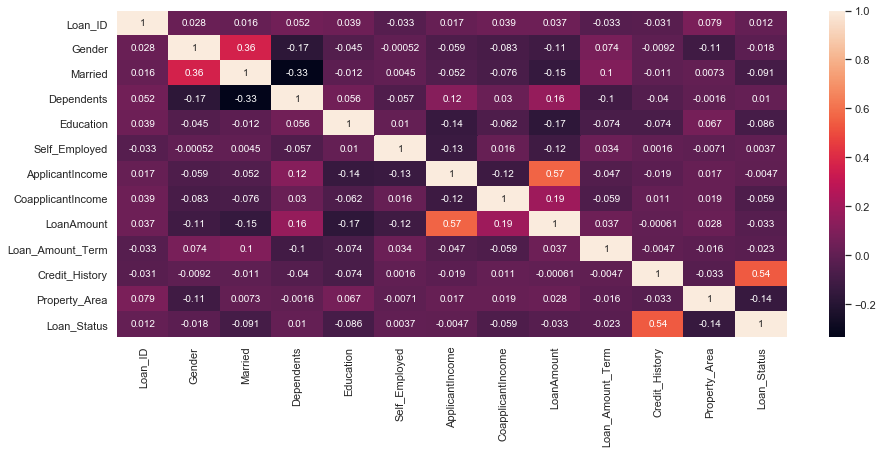

In [419]:
fig = plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True)

   # ডেটা প্রিপ্রসেস

## ক্যাটাগরিক্যাল ভ্যালু ম্যাপিং করা 

In [274]:
Married_mapping = {'Yes': 0, 'No': 1}
for data in dataset:
    data['Married'] = data['Married'].map(Married_mapping)
    
Dependent_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
for data in dataset:
    data['Dependents'] = data['Dependents'].map(Dependent_mapping)

Education_mapping = {'Graduate': 0, 'Not Graduate': 1}
for data in dataset:
    data['Education'] = data['Education'].map(Education_mapping)

Self_Employed_mapping = {'Yes': 0, 'No': 1}
for data in dataset:
    data['Self_Employed'] = data['Self_Employed'].map(Self_Employed_mapping)


Property_Area_mapping = {'Semiurban': 0, 'Urban': 1, 'Rural': 2}
for data in dataset:
    data['Property_Area'] = data['Property_Area'].map(Property_Area_mapping)

Gender_mapping = {'Male': 0, 'Female': 1}
for data in dataset:
    data['Gender'] = data['Gender'].map(Gender_mapping)
    

In [438]:

Gender_mapping = {'Male': 0, 'Female': 1}
for data in dataset:
    data['Gender'] = data['Gender'].map(Gender_mapping)
    

TypeError: string indices must be integers

In [318]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
test_data = test['Loan_ID']
labelencoder_X = LabelEncoder()
train['Loan_Status'] = labelencoder_X.fit_transform(train['Loan_Status'])
train['Loan_ID'] = labelencoder_X.fit_transform(train['Loan_ID'])
test['Loan_ID'] = labelencoder_X.fit_transform(test['Loan_ID'])



## মিসিং ভ্যালু হ্যান্ডেল করা 

In [384]:
missing_value = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 
                 'Loan_Amount_Term', 'Credit_History']

test_missing_value = ['Gender', 'Dependents', 'Self_Employed', 'LoanAmount', 
                 'Loan_Amount_Term', 'Credit_History']

for value in missing_value:
    mean = train[value].mean()
    train[value].fillna(mean, inplace=True)

for value in missing_value:
    mean = test[value].mean()
    test[value].fillna(mean, inplace=True)
    

In [385]:
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [386]:
missing_value = ['Gender', 'Dependents', 'Self_Employed', 'LoanAmount', 
                 'Loan_Amount_Term', 'Credit_History']

for value in missing_value:
    mean = test[value].mean()
    test[value].fillna(mean, inplace=True)

In [387]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## ডেটা বিনিং করা 

In [434]:
for data in dataset:
    data.loc[(data['LoanAmount'] <= 90), 'LoanAmount'] = 0,
    data.loc[(data['LoanAmount'] > 90) & (data['LoanAmount'] <= 155), 'LoanAmount'] = 1,
    data.loc[(data['LoanAmount'] > 155) & (data['LoanAmount'] <= 400), 'LoanAmount'] = 2,
    data.loc[(data['LoanAmount'] > 400), 'LoanAmount'] = 3

AttributeError: 'str' object has no attribute 'iloc'

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# ভ্যালিডেশন ডেটা সেট (ডেটাসেটকে স্প্লিট করা)

In [396]:
array = train.values
test_array = test.values
X = array[:,0:12]
Y = array[:,12]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [397]:
print(X.shape)
print(train.shape)
print(test_data.shape)

(614, 12)
(614, 13)
(367,)


In [398]:
print(X_train.shape)
print(X_validation.shape)

(491, 4)
(123, 4)


In [244]:
print(Y_train.shape)
print(Y_validation.shape)

(491,)
(123,)


# ইভ্যালুয়েট এলগরিফদম 

##   ডেটাকে স্ট্যান্ডার্ডাইজ  না করে

In [399]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.804531 (0.038629)
KNN: 0.692449 (0.064871)
CART: 0.729388 (0.065460)
NB: 0.804571 (0.033720)
SVM: 0.686367 (0.089449)


## ডেটাকে স্ট্যান্ডার্ডাইজ  করে

In [400]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.806571 (0.037566)
ScaledLDA: 0.804531 (0.038629)
ScaledKNN: 0.776204 (0.049160)
ScaledCART: 0.727347 (0.062325)
ScaledNB: 0.804571 (0.033720)
ScaledSVM: 0.806571 (0.037566)


In [401]:
results = np.array(results).transpose()
df = pd.DataFrame(results, columns=names)
df.iplot(kind='box')

## এলগরিদম  টিউনিং করে 

In [312]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=C_param_range)
model = LogisticRegression(penalty='l2')
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_*100, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(("%f (%f) with: %r") % (mean*100, stdev, param))

Best: 80.648980 using {'C': 1}
68.840816 (0.087480) with: {'C': 0.001}
80.444898 (0.088639) with: {'C': 0.01}
80.444898 (0.086740) with: {'C': 0.1}
80.648980 (0.082825) with: {'C': 1}
80.444898 (0.085287) with: {'C': 10}
80.444898 (0.085287) with: {'C': 100}
80.444898 (0.085287) with: {'C': 1000}


In [413]:
# Tune scaled SVM
scoring = 'accuracy'
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.806571 using {'C': 0.1, 'kernel': 'poly'}
0.804531 (0.046461) with: {'C': 0.1, 'kernel': 'linear'}
0.806571 (0.037566) with: {'C': 0.1, 'kernel': 'poly'}
0.802490 (0.046346) with: {'C': 0.1, 'kernel': 'rbf'}
0.802490 (0.048109) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.804531 (0.046461) with: {'C': 0.3, 'kernel': 'linear'}
0.804531 (0.037535) with: {'C': 0.3, 'kernel': 'poly'}
0.804531 (0.038629) with: {'C': 0.3, 'kernel': 'rbf'}
0.802490 (0.048967) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.804531 (0.046461) with: {'C': 0.5, 'kernel': 'linear'}
0.804531 (0.037535) with: {'C': 0.5, 'kernel': 'poly'}
0.806571 (0.037566) with: {'C': 0.5, 'kernel': 'rbf'}
0.798408 (0.051004) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.804531 (0.046461) with: {'C': 0.7, 'kernel': 'linear'}
0.804531 (0.037535) with: {'C': 0.7, 'kernel': 'poly'}
0.806571 (0.037566) with: {'C': 0.7, 'kernel': 'rbf'}
0.790245 (0.061169) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.804531 (0.046461) with: {'C': 0.9, 'kernel': 'linear

In [411]:
score

[0.6884081632653061,
 0.6884081632653061,
 0.6863673469387754,
 0.6863673469387754,
 0.6863673469387754,
 0.6863673469387754,
 0.6884081632653061,
 0.6904489795918367,
 0.6904489795918367,
 0.6904489795918367]

## এনসেম্বল মেথড ব্যবহার করে 

In [402]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('AB',
AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('GBM',
GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('RF',
RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('ET',
ExtraTreesClassifier())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.798449 (0.042781)
ScaledGBM: 0.778041 (0.029166)
ScaledRF: 0.745633 (0.051893)
ScaledET: 0.751755 (0.058987)


# মডেল ফাইনালাইজ 

In [375]:
# prepare the model
# LogisticRegression

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model = LogisticRegression(penalty='l2', C=1)
model.fit(rescaledX, Y)

# estimate accuracy on validation dataset
rescaledTestData = scaler.transform(test)
predictions = model.predict(rescaledTestData)

In [423]:
# prepare the model
# LinearDiscriminantAnalysis

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model = LinearDiscriminantAnalysis()
model.fit(rescaledX, Y)

# estimate accuracy on validation dataset
rescaledTestData = scaler.transform(test)
predictions = model.predict(rescaledTestData)


In [378]:
# prepare the model
# LinearDiscriminantAnalysis

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model = ExtraTreesClassifier()
model.fit(rescaledX, Y)

# estimate accuracy on validation dataset
rescaledTestData = scaler.transform(test)
predictions = model.predict(rescaledTestData)


In [424]:
df = pd.DataFrame(predictions)

In [425]:
df[0].value_counts()

1.0    308
0.0     59
Name: 0, dtype: int64

In [426]:
prediction = []
for value in predictions:
    if value == 1.0:
        prediction.append('Y')
    else:
        prediction.append('N')

In [427]:
submission = pd.DataFrame({
    'Loan_ID' : test_data,
    'Loan_Status' : prediction
})

submission.to_csv('submission.csv', index=False)

In [428]:
submission = pd.read_csv('submission.csv')
submission.head(20)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [328]:
dataset = pd.read_csv('loan_train.csv')

In [330]:
dataset.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [393]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(max_depth=2, random_state=42)
clf.fit(X, Y)
clf.feature_importances_

array([0.01074085, 0.00490522, 0.0902763 , 0.00670038, 0.06919778,
       0.00367858, 0.02700287, 0.08333801, 0.01354048, 0.02261963,
       0.51510651, 0.15289339])

In [394]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(614, 4)